In [68]:
import pandas as pd 
GoldUP=pd.read_csv('GoldUP.csv')

In [69]:
GoldUP

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...,...
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35


In [70]:
GoldUP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           239 non-null    object 
 1   Gold_Price     239 non-null    int64  
 2   Crude_Oil      239 non-null    float64
 3   Interest_Rate  239 non-null    float64
 4   USD_INR        239 non-null    float64
 5   Sensex         239 non-null    float64
 6   CPI            239 non-null    float64
 7   USD_Index      239 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.1+ KB


In [71]:
GoldUP.describe()

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,19299.062762,3397.686318,6.715900,53.804819,18172.443891,73.372050,90.182510
std,11668.913490,1551.627401,1.188309,10.311144,11032.206600,29.106141,11.312607
min,4267.000000,887.420000,4.250000,39.366685,2811.600000,36.730000,71.800000
25%,6712.500000,2180.695000,6.000000,45.467395,8263.400000,45.190000,81.110000
50%,19056.000000,3303.550000,6.000000,48.664774,17464.810000,68.470000,88.940000
75%,29364.000000,4492.930000,7.000000,63.861030,26662.395000,101.370000,97.160000
max,52917.000000,6926.830000,10.250000,76.222334,41253.740000,129.300000,120.240000


In [72]:
GoldUP.isnull().any()

Date             False
Gold_Price       False
Crude_Oil        False
Interest_Rate    False
USD_INR          False
Sensex           False
CPI              False
USD_Index        False
dtype: bool

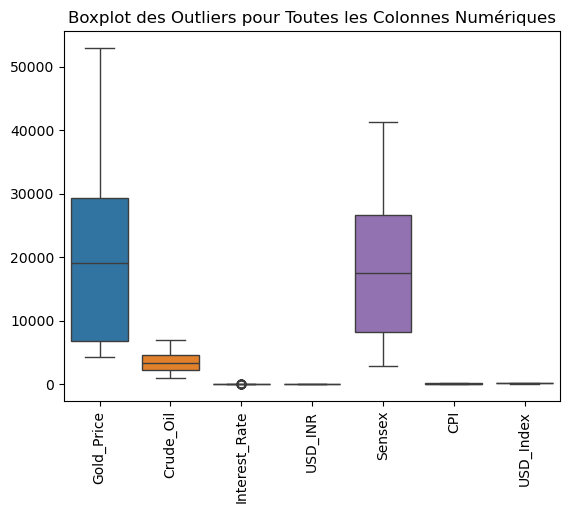

In [73]:
#*----------verifier l'existance des outliers dans le dataset----------*

dataset_numerical = GoldUP.select_dtypes(include=['number'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dataset_numerical)  
plt.title("Boxplot des Outliers pour Toutes les Colonnes Numériques")
plt.xticks(rotation=90)
plt.show()

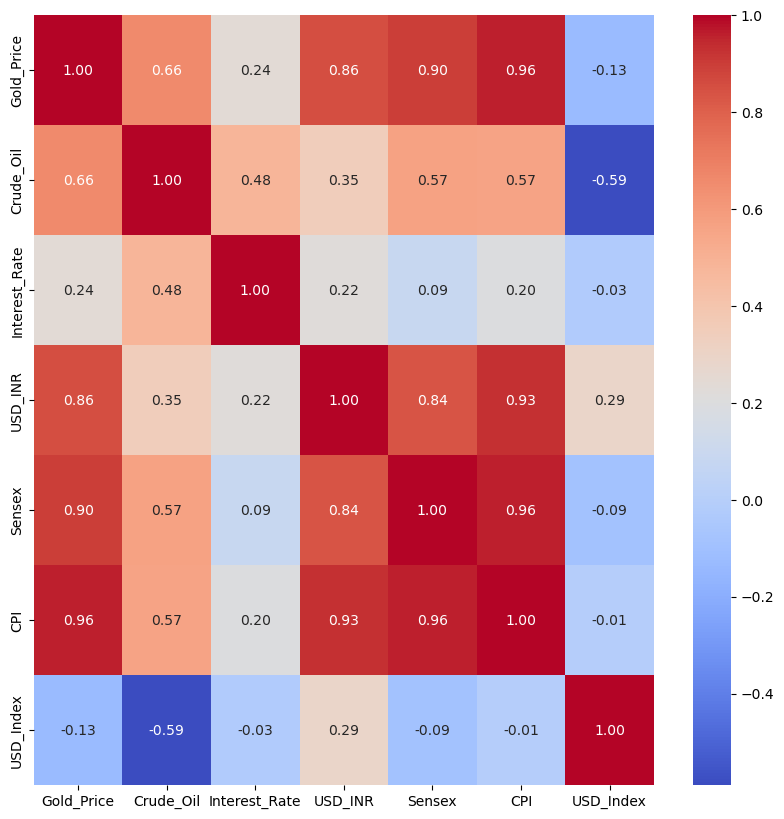

In [74]:
#*---------la matrice de corrélation pour mesurer la force entre les x et y-------------*

# Exclure la colonne 'date' 
df_numeric = GoldUP.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Afficher la matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


#*--------le x qui a la plus grande relation avec le y est le CPI---------*

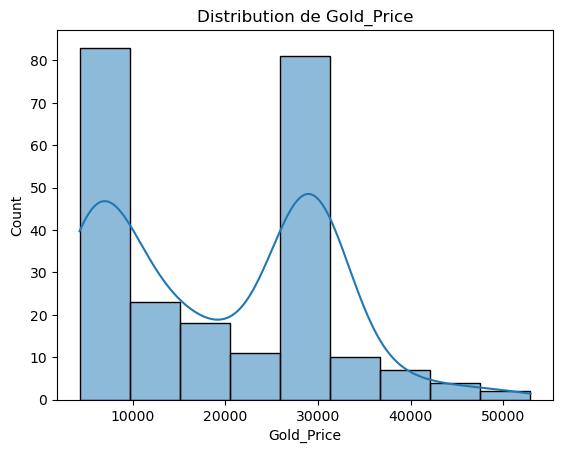

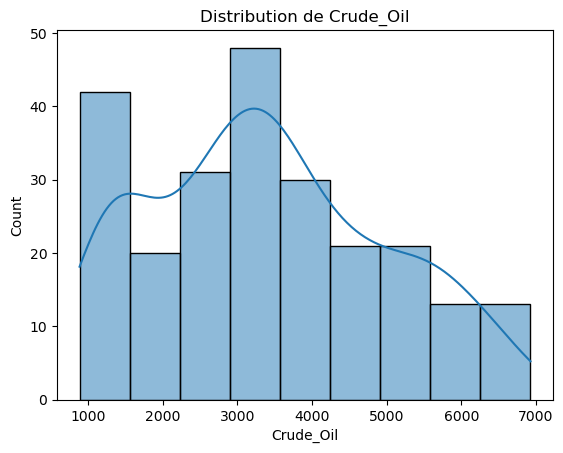

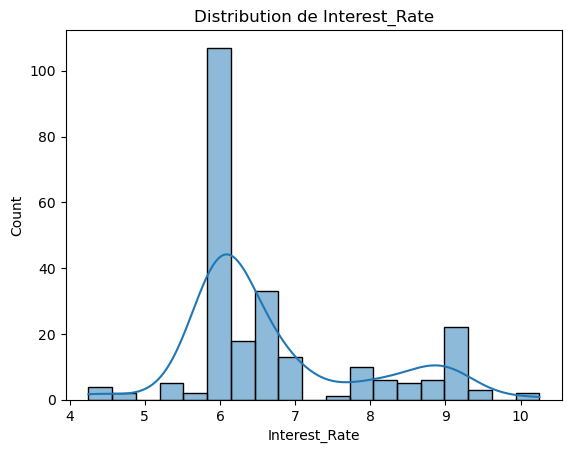

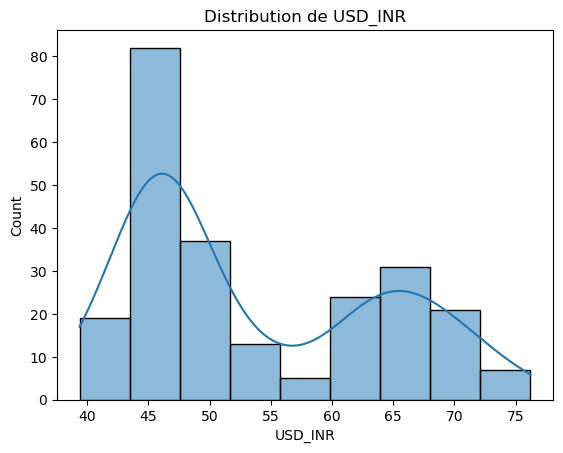

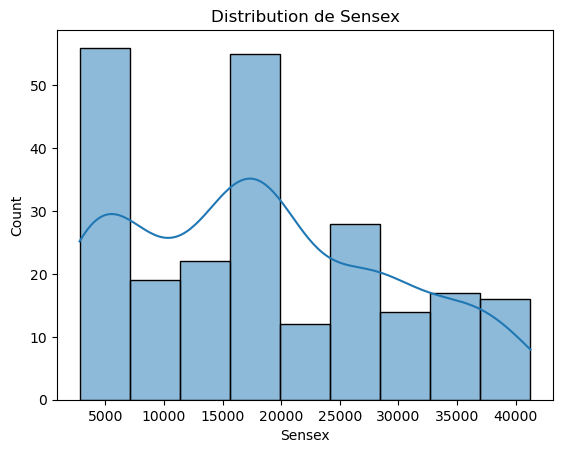

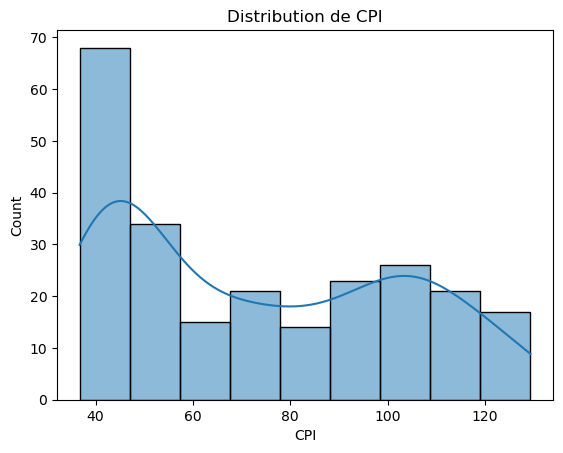

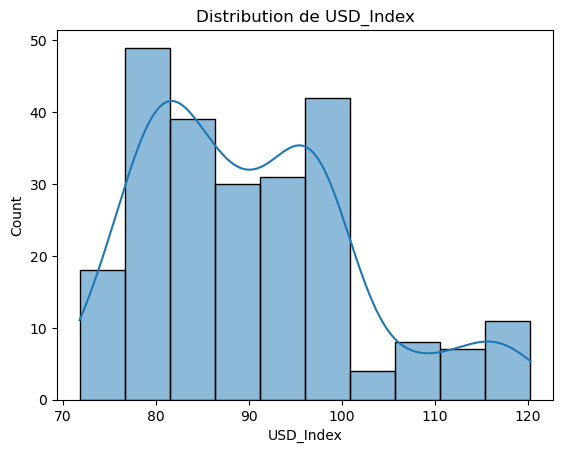

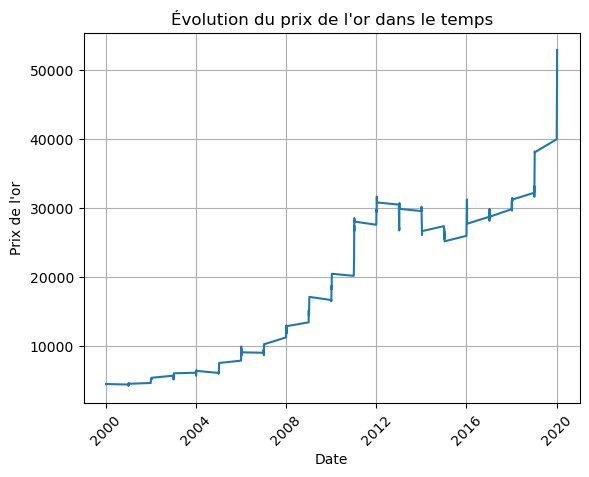

In [114]:
# ------------Analyse Exploratoire Avancée--------------------
# Distribution des variables
for col in GoldUP.select_dtypes(include=['float', 'int']):
    sns.histplot(GoldUP[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

# Tendance temporelle
GoldUP['Date'] = pd.to_datetime(GoldUP['Date'])
GoldUP.sort_values('Date', inplace=True)
plt.plot(GoldUP['Date'], GoldUP['Gold_Price'])
plt.title("Évolution du prix de l'or dans le temps")
plt.xlabel("Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel("Prix de l'or")
plt.show()

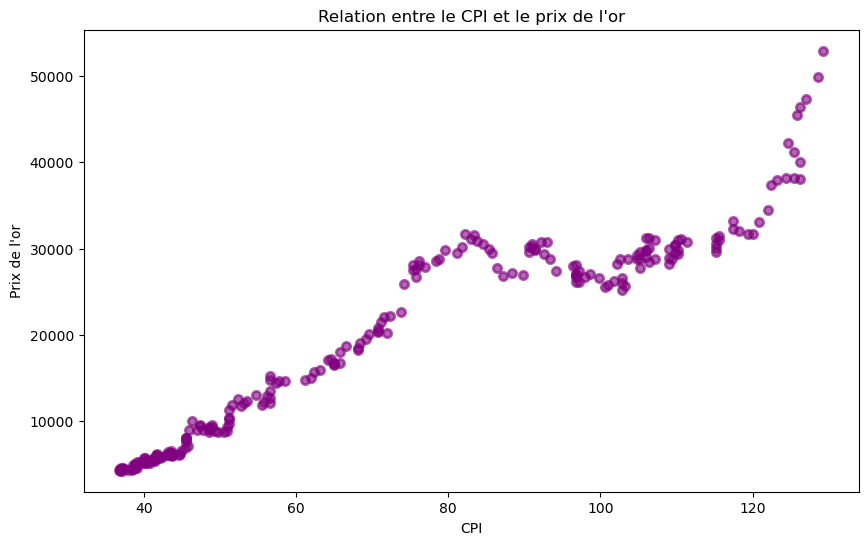

In [75]:
#*----------visualiser la relation réelle entre le CPI et le prix de l'or--------------*

import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.scatter(GoldUP["CPI"],GoldUP["Gold_Price"], color='purple', linewidth=2, alpha=0.6, label='Courbe linéaire')
plt.title("Relation entre le CPI et le prix de l'or")
plt.xlabel("CPI")
plt.ylabel("Prix de l'or")
plt.show()

In [76]:
#*----------découper les données en expliquative (x=CPI) et cible (y=Gold_Price)---------*

x = GoldUP["CPI"].values.reshape(-1, 1)  # Conversion en tableau 2D
y = GoldUP["Gold_Price"].values.reshape(-1, 1)  # Idem pour y

In [77]:
#*-----------l'échantillonnage-------------*
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.2,random_state = 9)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (191, 1)
Y_train shape: (191, 1)
X_test shape: (48, 1)
Y_test shape: (48, 1)


In [78]:
import numpy as np
import time  # Importer le module pour mesurer le temps

# Mesurer le temps d'entraînement
start_time = time.time()  # Début de l'entraînement

# Calcul des paramètres de la régression linéaire simple
X_mean = np.mean(X_train)
Y_mean = np.mean(Y_train)
XY_mean = np.mean(X_train * Y_train)
X_squared_mean = np.mean(X_train**2)

# Covariance et variance
cov_XY = XY_mean - (X_mean * Y_mean)
var_X = X_squared_mean - (X_mean**2)

# Coefficients
b1 = cov_XY / var_X
b0 = Y_mean - b1 * X_mean

# Fin de l'entraînement
train_time = time.time() - start_time  # Durée de l'entraînement

print(f"b1 (pente) = {b1}")
print(f"b0 (ordonnée à l'origine) = {b0}")

# Prédictions
Y_pred = b0 + b1 * X_test

# Calcul du MSE (Mean Squared Error)
MSE_l = np.mean((Y_test - Y_pred) ** 2)

# Calcul de la précision (R²)
Y_mean_test = np.mean(Y_test)  # Moyenne des valeurs réelles de test
total_error = np.sum((Y_test - Y_mean_test) ** 2)  # Erreur totale
residual_error = np.sum((Y_test - Y_pred) ** 2)  # Erreur résiduelle
R2_l = 1 - (residual_error / total_error)  # Calcul de R²

# Affichage des résultats
print(f'Mean Squared Error (MSE) : {MSE_l}')
print(f'Précision (R²) : {R2_l}')
print(f'Temps d\'entraînement : {train_time:.6f} secondes')

# Sauvegarde des résultats
results = []
complexity = 2  # Deux paramètres (b0 et b1)
results.append({
    'Modèle': "Lineaire",
    'MSE': MSE_l,
    'Précision (R²)': R2_l,
    'Temps d\'entraînement (s)': train_time,
    'Complexité (paramètres)': complexity
})



b1 (pente) = 387.58015230133196
b0 (ordonnée à l'origine) = -9062.64286290231
Mean Squared Error (MSE) : 8688144.273603955
Précision (R²) : 0.926411825881692
Temps d'entraînement : 0.000998 secondes


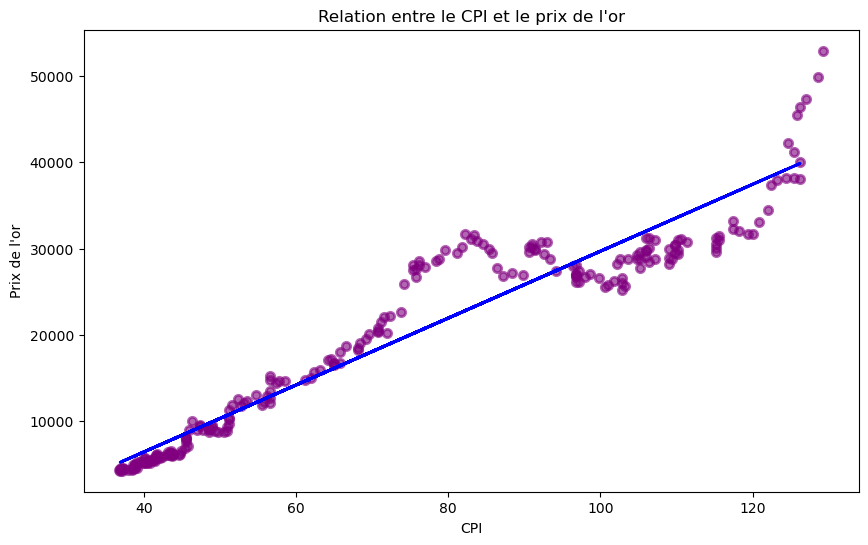

In [79]:
#*----------visualiser la regréssion lineaire simple-----------*

import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.scatter(GoldUP["CPI"],GoldUP["Gold_Price"], color='purple', linewidth=2, label='Nuage de points',alpha=0.6)
plt.title("Relation entre le CPI et le prix de l'or")
plt.xlabel("CPI")
plt.ylabel("Prix de l'or")
plt.plot(X_test, Y_pred, color='blue', linewidth=2, label='Droite de régression')
plt.show()

Mean Squared Error (MSE) : 6499750.8030163795
Précision (R²) : 0.9449474158398644


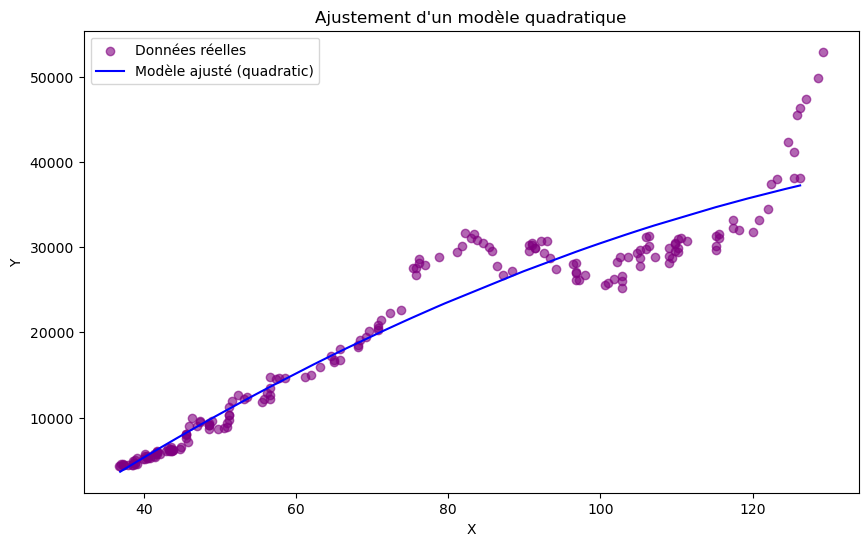

In [80]:
#*-------------générer le modèle de regréssion polynomiale avec un degré de 2 en utilisant la méthode de moindre carré----------*

import numpy as np
import matplotlib.pyplot as plt

# Données d'entrée
x = X_train.flatten()  # S'assurer que X_train est un vecteur 1D
y = Y_train.flatten()  # S'assurer que Y_train est un vecteur 1D

# Construire la matrice X avec les termes 1, x, x^2
X = np.column_stack((np.ones_like(x), x, x**2))

# Calcul des coefficients A = (X^T X)^(-1) X^T Y
XT_X = X.T @ X  # Calcul de X^T X
XT_Y = X.T @ y  # Calcul de X^T Y
coefficients = np.linalg.inv(XT_X) @ XT_Y  # Calcul des coefficients

# Extraire les coefficients
c0, c1, c2 = coefficients.flatten()

# Prédictions pour X_test
X_test_matrix = np.column_stack((np.ones_like(X_test.flatten()), X_test.flatten(), X_test.flatten()**2))
Y_pred = X_test_matrix @ coefficients  # Calcul des prédictions

# Calcul du MSE (Mean Squared Error)
MSE = np.mean((Y_test.flatten() - Y_pred) ** 2)

# Calcul de la précision (R²)
Y_mean_test = np.mean(Y_test.flatten())  # Moyenne des valeurs réelles de test
total_error = np.sum((Y_test.flatten() - Y_mean_test) ** 2)  # Erreur totale
residual_error = np.sum((Y_test.flatten() - Y_pred) ** 2)  # Erreur résiduelle
R2 = 1 - (residual_error / total_error)  # Calcul de R²

# Affichage des résultats
print(f'Mean Squared Error (MSE) : {MSE}')
print(f'Précision (R²) : {R2}')

# Représentation graphique
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('white') 
plt.scatter(x, y, color="purple", label="Données réelles", marker="o", alpha=0.6)  # Points réels

# Tracer les prédictions triées pour l'affichage
X_test_sorted = np.sort(X_test.flatten())
Y_pred_sorted = c0 + c1 * X_test_sorted + c2 * X_test_sorted**2
plt.plot(X_test_sorted, Y_pred_sorted, color="blue", label="Modèle ajusté (quadratic)")  # Courbe du modèle ajusté

plt.title("Ajustement d'un modèle quadratique")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Coefficients du modèle : [-3.47334611e+05  3.11114053e+04 -1.10981691e+03  2.01775803e+01
 -1.93367813e-01  9.24752218e-04 -1.72510898e-06]
Mean Squared Error (MSE) : 2494079.4023119197
Précision (R²) : 0.9788752645510475


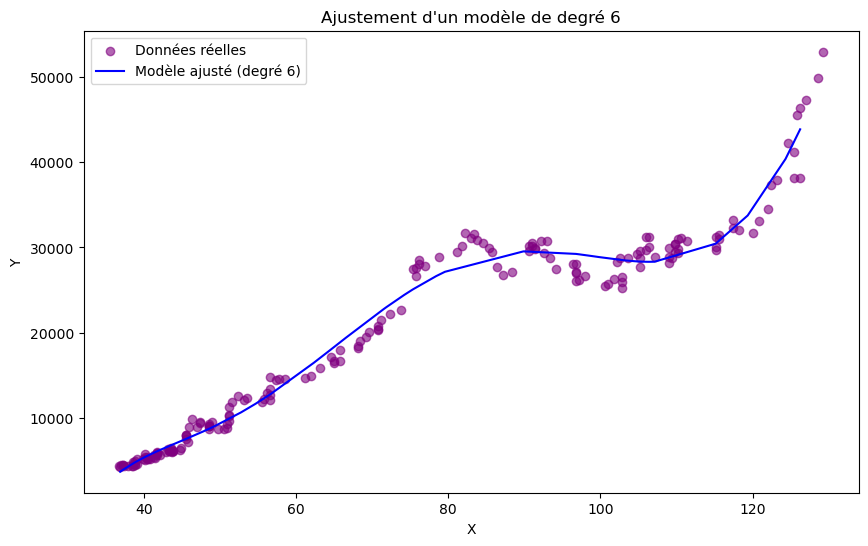

In [81]:
#*-------------générer le modèle de regréssion polynomiale avec un degré de 6 en utilisant la méthode de moindre carré----------*

import numpy as np
import matplotlib.pyplot as plt

# Données d'entrée
x = X_train.flatten()  # S'assurer que X_train est un vecteur 1D
y = Y_train.flatten()  # S'assurer que Y_train est un vecteur 1D

# Construire la matrice X avec les termes jusqu'à x^6
X = np.column_stack([x**i for i in range(7)])  # Générer les colonnes pour x^0, x^1, ..., x^6

# Calcul des coefficients A = (X^T X)^(-1) X^T Y
XT_X = X.T @ X  # Calcul de X^T X
XT_Y = X.T @ y  # Calcul de X^T Y
coefficients = np.linalg.inv(XT_X) @ XT_Y  # Calcul des coefficients

# Extraire les coefficients
coefficients = coefficients.flatten()

# Affichage des coefficients
print("Coefficients du modèle :", coefficients)

# Prédictions pour X_test
X_test_matrix = np.column_stack([X_test.flatten()**i for i in range(7)])  # Construire la matrice de test
Y_pred = X_test_matrix @ coefficients  # Calcul des prédictions

# Calcul du MSE (Mean Squared Error)
MSE = np.mean((Y_test.flatten() - Y_pred) ** 2)

# Calcul de la précision (R²)
Y_mean_test = np.mean(Y_test.flatten())  # Moyenne des valeurs réelles de test
total_error = np.sum((Y_test.flatten() - Y_mean_test) ** 2)  # Erreur totale
residual_error = np.sum((Y_test.flatten() - Y_pred) ** 2)  # Erreur résiduelle
R2 = 1 - (residual_error / total_error)  # Calcul de R²

# Affichage des résultats
print(f'Mean Squared Error (MSE) : {MSE}')
print(f'Précision (R²) : {R2}')

# Préparation des données pour l'affichage
X_test_sorted = np.sort(X_test.flatten())
Y_pred_sorted = sum(coefficients[i] * X_test_sorted**i for i in range(7))  # Prédictions triées pour affichage

# Représentation graphique
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="purple", label="Données réelles", marker="o", alpha=0.6)  # Points réels
plt.plot(X_test_sorted, Y_pred_sorted, color="blue", label="Modèle ajusté (degré 6)")  # Courbe du modèle ajusté
plt.title("Ajustement d'un modèle de degré 6")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Coefficients du modèle : [ 7.65699700e+06 -9.09935953e+05  4.59459277e+04 -1.28706367e+03
  2.18869886e+01 -2.31496586e-01  1.48899444e-03 -5.33395274e-06
  8.16365453e-09]
MSE (Erreur quadratique moyenne) : 1577138.4644405276
Précision (R²) : 0.9866417112475289


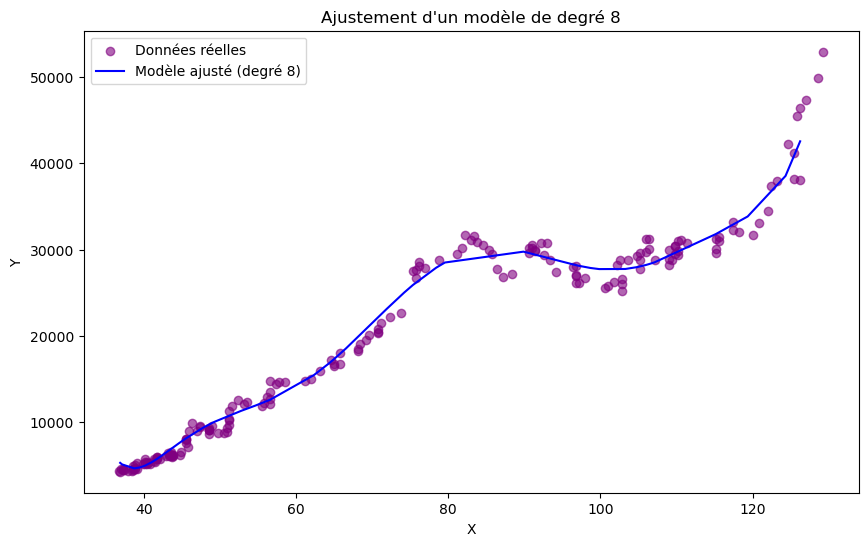

In [82]:
#*-------------générer le modèle de regréssion polynomiale avec un degré de 8 en utilisant la méthode de moindre carré----------*

import numpy as np
import matplotlib.pyplot as plt

# Données d'entrée
x = X_train.flatten()  # S'assurer que X_train est un vecteur 1D
y = Y_train.flatten()  # S'assurer que Y_train est un vecteur 1D

# Construire la matrice X avec les termes jusqu'à x^8
X = np.column_stack([x**i for i in range(9)])  # Générer les colonnes pour x^0, x^1, ..., x^8

# Calcul des coefficients A = (X^T X)^(-1) X^T Y
XT_X = X.T @ X  # Calcul de X^T X
XT_Y = X.T @ y  # Calcul de X^T Y
coefficients = np.linalg.inv(XT_X) @ XT_Y  # Calcul des coefficients

# Extraire les coefficients
coefficients = coefficients.flatten()

# Affichage des coefficients
print("Coefficients du modèle :", coefficients)

# Prédictions pour X_test
X_test_matrix = np.column_stack([X_test.flatten()**i for i in range(9)])  # Construire la matrice de test
Y_pred = X_test_matrix @ coefficients  # Calcul des prédictions

# Calcul des erreurs (résidus)
residuals = Y_test.flatten() - Y_pred  # Erreur entre les prédictions et les valeurs réelles

# Calcul du MSE (Mean Squared Error)
MSE = np.mean(residuals**2)
print(f"MSE (Erreur quadratique moyenne) : {MSE}")

# Calcul du R² (Précision)
SS_total = np.sum((Y_test.flatten() - np.mean(Y_test.flatten()))**2)  # Somme totale des carrés
SS_residual = np.sum(residuals**2)  # Somme des carrés des résidus
R2 = 1 - (SS_residual / SS_total)  # Calcul du R²
print(f"Précision (R²) : {R2}")

# Préparation des données pour l'affichage
X_test_sorted = np.sort(X_test.flatten())
Y_pred_sorted = sum(coefficients[i] * X_test_sorted**i for i in range(9))  # Prédictions triées pour affichage

# Représentation graphique
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="purple", label="Données réelles", marker="o", alpha=0.6)  # Points réels
plt.plot(X_test_sorted, Y_pred_sorted, color="blue", label="Modèle ajusté (degré 8)")  # Courbe du modèle ajusté
plt.title("Ajustement d'un modèle de degré 8")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Coefficients du modèle : [ 8.33510950e+06 -9.59845000e+05  4.58757227e+04 -1.15872498e+03
  1.57467842e+01 -8.30281973e-02 -6.79069664e-04  1.45769991e-05
 -1.04618536e-07  3.60686814e-10 -4.98844564e-13]
MSE (Erreur quadratique moyenne) : 2069161.7978740009
Précision (R²) : 0.982474296712186


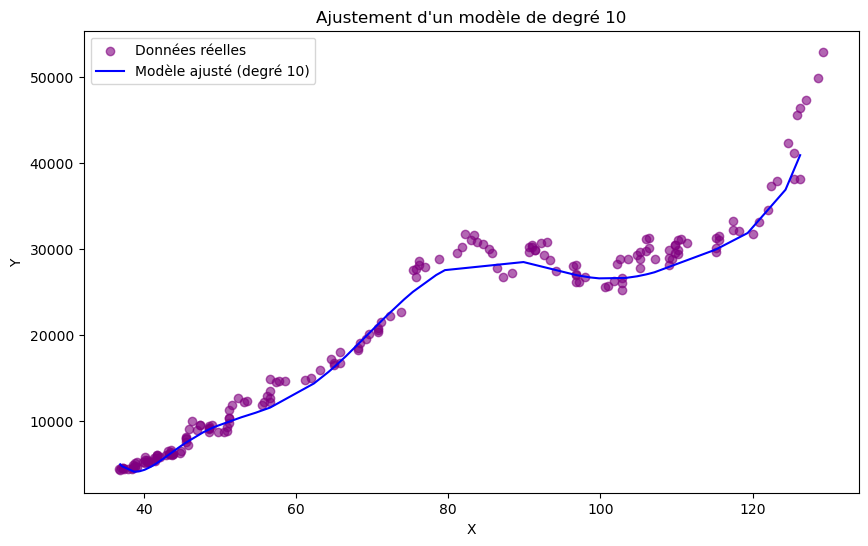

In [83]:
#*-------------générer le modèle de regréssion polynomiale avec un degré de 10 en utilisant la méthode de moindre carré--------*

import numpy as np
import matplotlib.pyplot as plt

# Données d'entrée
x = X_train.flatten()  # S'assurer que X_train est un vecteur 1D
y = Y_train.flatten()  # S'assurer que Y_train est un vecteur 1D

# Construire la matrice X avec les termes jusqu'à x^10
X = np.column_stack([x**i for i in range(11)])  # Générer les colonnes pour x^0, x^1, ..., x^10

# Calcul des coefficients A = (X^T X)^(-1) X^T Y
XT_X = X.T @ X  # Calcul de X^T X
XT_Y = X.T @ y  # Calcul de X^T Y
coefficients = np.linalg.inv(XT_X) @ XT_Y  # Calcul des coefficients

# Extraire les coefficients
coefficients = coefficients.flatten()

# Affichage des coefficients
print("Coefficients du modèle :", coefficients)

# Prédictions pour X_test
X_test_matrix = np.column_stack([X_test.flatten()**i for i in range(11)])  # Construire la matrice de test
Y_pred = X_test_matrix @ coefficients  # Calcul des prédictions

# Calcul des erreurs (résidus)
residuals = Y_test.flatten() - Y_pred  # Erreur entre les prédictions et les valeurs réelles

# Calcul du MSE (Mean Squared Error)
MSE = np.mean(residuals**2)
print(f"MSE (Erreur quadratique moyenne) : {MSE}")

# Calcul du R² (Précision)
SS_total = np.sum((Y_test.flatten() - np.mean(Y_test.flatten()))**2)  # Somme totale des carrés
SS_residual = np.sum(residuals**2)  # Somme des carrés des résidus
R2 = 1 - (SS_residual / SS_total)  # Calcul du R²
print(f"Précision (R²) : {R2}")

# Préparation des données pour l'affichage
X_test_sorted = np.sort(X_test.flatten())
Y_pred_sorted = sum(coefficients[i] * X_test_sorted**i for i in range(11))  # Prédictions triées pour affichage

# Représentation graphique
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="purple", label="Données réelles", marker="o", alpha=0.6)  # Points réels
plt.plot(X_test_sorted, Y_pred_sorted, color="blue", label="Modèle ajusté (degré 10)")  # Courbe du modèle ajusté
plt.title("Ajustement d'un modèle de degré 10")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Coefficients obtenus avec la décomposition QR : [-3.76467124e+07  5.53645173e+06 -3.54895531e+05  1.30104252e+04
 -3.00336838e+02  4.51402858e+00 -4.37255995e-02  2.53105663e-04
 -6.30217359e-07 -1.46896180e-09  1.35939933e-11 -2.57273913e-14]
MSE (Erreur quadratique moyenne) : 1178455.0262984326
Précision (R²) : 0.9900185412517475


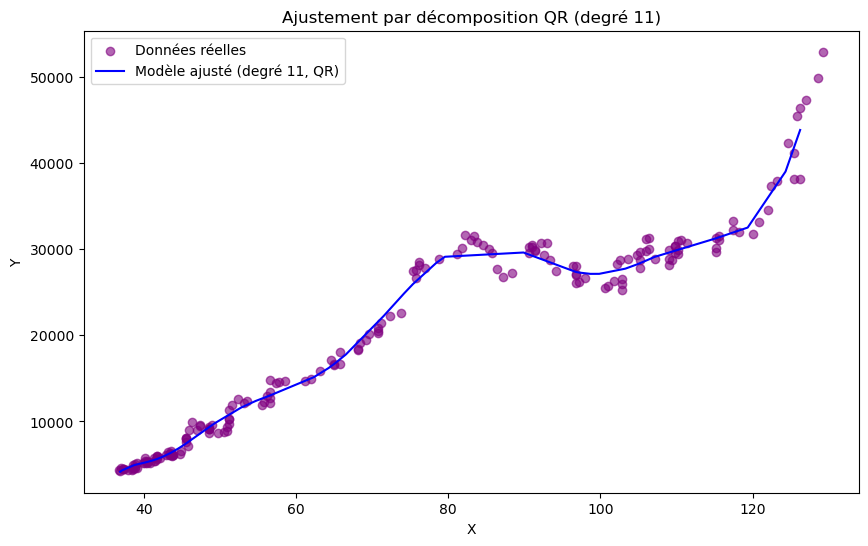

In [84]:
#*-------------générer le modèle de regréssion polynomiale avec un degré de 11 en utilisant la méthode de décomposition QR-----*

import numpy as np
import matplotlib.pyplot as plt

# Données d'entrée
x = X_train.flatten()  # S'assurer que X_train est un vecteur 1D
y = Y_train.flatten()  # S'assurer que Y_train est un vecteur 1D

# Construire la matrice X pour un polynôme de degré 11
X = np.column_stack([x**i for i in range(12)])  # Générer les colonnes pour x^0, x^1, ..., x^11

# Décomposition QR
Q, R = np.linalg.qr(X)  # Décomposer la matrice X en Q (orthogonale) et R (triangulaire supérieure)
coefficients = np.linalg.solve(R, Q.T @ y)  # Résoudre le système R * coefficients = Q.T @ y

# Affichage des coefficients
print("Coefficients obtenus avec la décomposition QR :", coefficients)

# Prédictions pour X_test
X_test_matrix = np.column_stack([X_test.flatten()**i for i in range(12)])  # Construire la matrice de test
Y_pred = X_test_matrix @ coefficients  # Calcul des prédictions

# Calcul des erreurs (résidus)
residuals = Y_test.flatten() - Y_pred  # Erreur entre les prédictions et les valeurs réelles

# Calcul du MSE (Mean Squared Error)
MSE = np.mean(residuals**2)
print(f"MSE (Erreur quadratique moyenne) : {MSE}")

# Calcul du R² (Précision)
SS_total = np.sum((Y_test.flatten() - np.mean(Y_test.flatten()))**2)  # Somme totale des carrés
SS_residual = np.sum(residuals**2)  # Somme des carrés des résidus
R2 = 1 - (SS_residual / SS_total)  # Calcul du R²
print(f"Précision (R²) : {R2}")

# Préparation des données pour l'affichage
X_test_sorted = np.sort(X_test.flatten())
Y_pred_sorted = sum(coefficients[i] * X_test_sorted**i for i in range(12))  # Prédictions triées pour affichage

# Représentation graphique
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="purple", label="Données réelles", marker="o", alpha=0.6)  # Points réels
plt.plot(X_test_sorted, Y_pred_sorted, color="blue", label="Modèle ajusté (degré 11, QR)")  # Courbe du modèle ajusté
plt.title("Ajustement par décomposition QR (degré 11)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Coefficients obtenus avec la décomposition QR : [ 3.01052637e+11 -7.83708200e+10  9.51358321e+09 -7.15563031e+08
  3.73711780e+07 -1.43925780e+06  4.23651618e+04 -9.74690535e+02
  1.77711456e+01 -2.58747638e-01  3.01630995e-03 -2.80923678e-05
  2.07534088e-07 -1.19996158e-09  5.31233383e-12 -1.73803741e-14
  3.95839187e-17 -5.60191452e-20  3.70854281e-23]
MSE (Erreur quadratique moyenne) : 889239.8364919027
Précision (R²) : 0.9924681803317295
Temps d'entraînement : 0.000000 secondes


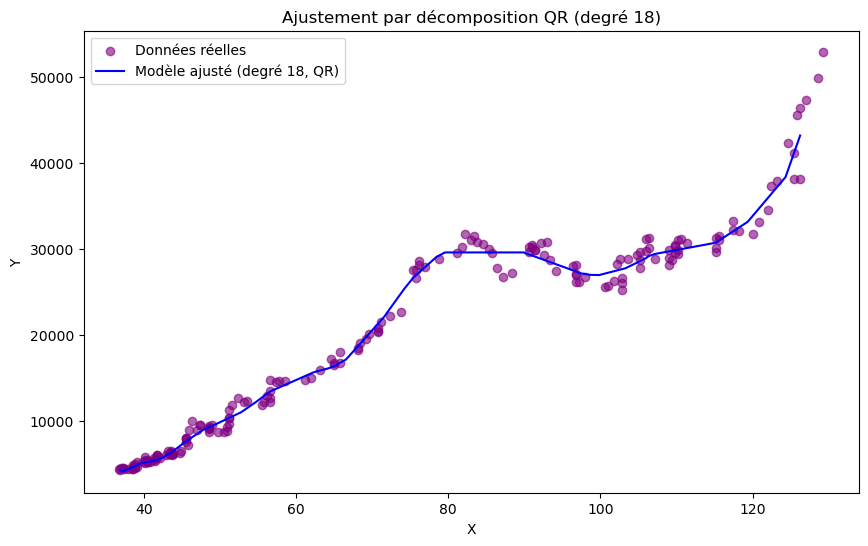

In [85]:
#*-------------générer le modèle de regréssion polynomiale avec un degré de 18 en utilisant la méthode de décomposition QR-----------*

import numpy as np
import matplotlib.pyplot as plt
import time  # Importer le module pour mesurer le temps

# Données d'entrée
x = X_train.flatten()  # S'assurer que X_train est un vecteur 1D
y = Y_train.flatten()  # S'assurer que Y_train est un vecteur 1D

# Construire la matrice X pour un polynôme de degré 18
X = np.column_stack([x**i for i in range(19)])  # Générer les colonnes pour x^0, x^1, ..., x^18

# Mesurer le temps d'entraînement
start_time = time.time()  # Début de l'entraînement

# Décomposition QR
Q, R = np.linalg.qr(X)  # Décomposer la matrice X en Q (orthogonale) et R (triangulaire supérieure)
coefficients = np.linalg.solve(R, Q.T @ y)  # Résoudre le système R * coefficients = Q.T @ y

train_time = time.time() - start_time  # Fin de l'entraînement et calcul de la durée

# Affichage des coefficients
print("Coefficients obtenus avec la décomposition QR :", coefficients)

# Prédictions pour X_test
X_test_matrix = np.column_stack([X_test.flatten()**i for i in range(19)])  # Construire la matrice de test
Y_pred = X_test_matrix @ coefficients  # Calcul des prédictions

# Calcul des erreurs (résidus)
residuals = Y_test.flatten() - Y_pred  # Erreur entre les prédictions et les valeurs réelles

# Calcul du MSE (Mean Squared Error)
MSE = np.mean(residuals**2)
print(f"MSE (Erreur quadratique moyenne) : {MSE}")

# Calcul du R² (Précision)
SS_total = np.sum((Y_test.flatten() - np.mean(Y_test.flatten()))**2)  # Somme totale des carrés
SS_residual = np.sum(residuals**2)  # Somme des carrés des résidus
R2 = 1 - (SS_residual / SS_total)  # Calcul du R²
print(f"Précision (R²) : {R2}")

# Afficher le temps d'entraînement
print(f"Temps d'entraînement : {train_time:.6f} secondes")

# Sauvegarde des résultats
complexity = len(coefficients)
results.append({
    'Modèle': "Polynomiale deg=18",
    'MSE': MSE,
    'Précision (R²)': R2,
    'Temps d\'entraînement (s)': train_time,
    'Complexité (paramètres)': complexity
})

# Préparation des données pour l'affichage
X_test_sorted = np.sort(X_test.flatten())
Y_pred_sorted = sum(coefficients[i] * X_test_sorted**i for i in range(19))  # Prédictions triées pour affichage

# Représentation graphique
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="purple", label="Données réelles", marker="o", alpha=0.6)  # Points réels
plt.plot(X_test_sorted, Y_pred_sorted, color="blue", label="Modèle ajusté (degré 18, QR)")  # Courbe du modèle ajusté
plt.title("Ajustement par décomposition QR (degré 18)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


In [86]:
# Vérifiez les types de colonnes
print(GoldUP.dtypes)

# Sélectionnez uniquement les colonnes numériques pour X
X = GoldUP.select_dtypes(include=[np.number]).iloc[:, :-1].values  # Variables indépendantes
y = GoldUP.iloc[:, -1].values  # Variable cible (vérifiez si elle est numérique)


# Normalisation
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Division des données en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Date              object
Gold_Price         int64
Crude_Oil        float64
Interest_Rate    float64
USD_INR          float64
Sensex           float64
CPI              float64
USD_Index        float64
dtype: object


Temps d'entraînement: 0.11668181419372559 secondes
MSE Train: 379745072.71552986
MSE Test: 374687189.9043436
R² Train: -1.8566134343507628
R² Test: -1.5659850491498215
Weights: [2399.30116686  275.07003612 3122.75271507 2809.81830862 3763.82643117
 -755.81501292]


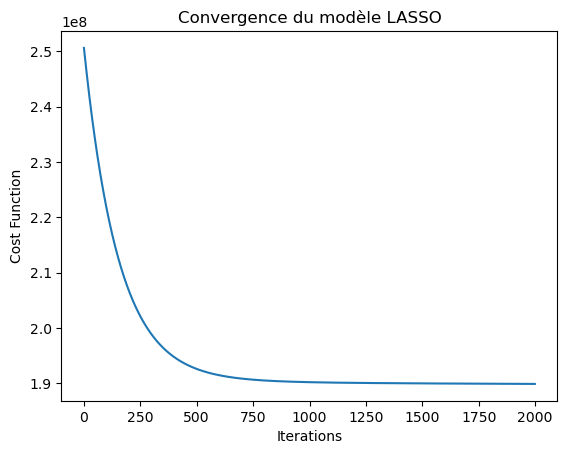

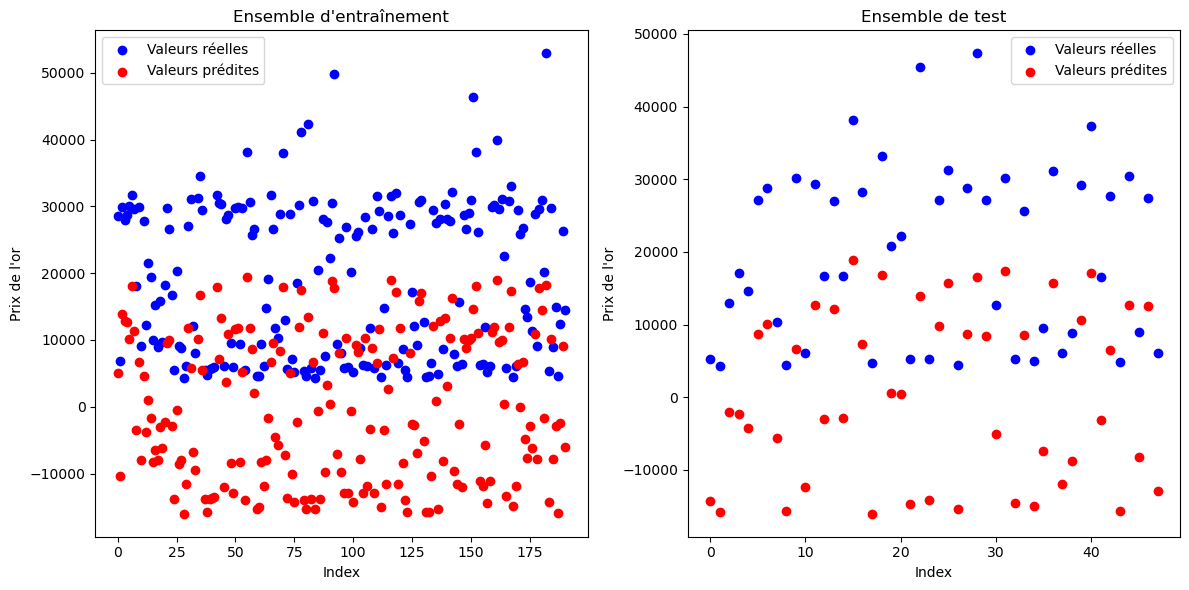

In [87]:
# LASSO
# LASSO
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialisation des paramètres
def initialize_weights(n_features):
    return np.random.uniform(-0.01, 0.01, n_features)  # Distribution uniforme pour initialisation stable

# Fonction coût pour LASSO
def compute_cost(X, y, weights, lambda_):
    n = len(y)
    predictions = np.dot(X, weights)
    mse = (1 / (2 * n)) * np.sum((y - predictions) ** 2)
    reg_term = lambda_ * np.sum(np.abs(weights[1:]))  # Exclure le biais de la régularisation
    return mse + reg_term

# Gradient pour LASSO
def compute_gradient(X, y, weights, lambda_):
    n = len(y)
    predictions = np.dot(X, weights)
    errors = predictions - y
    gradient = (1 / n) * np.dot(X.T, errors)
    reg_term = lambda_ * np.sign(weights)  # Gradient de la pénalisation L1
    reg_term[0] = 0  # Ne pas régulariser le biais
    return gradient + reg_term

# Descente de gradient
def gradient_descent(X, y, weights, lambda_, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights, lambda_)
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights, lambda_)
        cost_history.append(cost)
        # Afficher le coût tous les 100 itérations
       # if i % 100 == 0:
            #print(f"Iteration {i}, Cost: {cost:.4f}")
    return weights, cost_history

# Fonction manuelle pour calculer R²
def calculate_r2(y_actual, y_predicted):
    y_mean = np.mean(y_actual)
    ss_res = np.sum((y_actual - y_predicted) ** 2)
    ss_tot = np.sum((y_actual - y_mean) ** 2)
    return 1 - (ss_res / ss_tot)

# Préparer les données
import pandas as pd 
data=pd.read_csv('GoldUP.csv')
X = data[["Crude_Oil", "Interest_Rate", "USD_INR", "Sensex", "CPI", "USD_Index"]].values
y = data["Gold_Price"].values

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paramètres pour LASSO
lambda_ = 0.01  # Valeur ajustée pour éviter une régularisation trop forte
learning_rate = 0.001  # Taux d'apprentissage ajusté
iterations = 2000

# Initialisation des poids
weights = initialize_weights(X_train.shape[1])

# Entraînement
start_time = time.time()
weights, cost_history = gradient_descent(X_train, y_train, weights, lambda_, learning_rate, iterations)
training_time = time.time() - start_time

# Prédictions
y_pred_train = np.dot(X_train, weights)
y_pred_test = np.dot(X_test, weights)

# Évaluation
train_mse = (1 / len(y_train)) * np.sum((y_train - y_pred_train) ** 2)
test_mse = (1 / len(y_test)) * np.sum((y_test - y_pred_test) ** 2)
train_r2 = calculate_r2(y_train, y_pred_train)
test_r2 = calculate_r2(y_test, y_pred_test)

# Affichage des résultats
print("Temps d'entraînement:", training_time, "secondes")
print("MSE Train:", train_mse)
print("MSE Test:", test_mse)
print("R² Train:", train_r2)
print("R² Test:", test_r2)
print("Weights:", weights)

# Visualisation de la convergence
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Convergence du modèle LASSO")
plt.show()

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Données d'entraînement
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_train)), y_train, color='blue', label="Valeurs réelles")
plt.scatter(range(len(y_train)), y_pred_train, color='red', label="Valeurs prédites")
plt.title("Ensemble d'entraînement")
plt.xlabel("Index")
plt.ylabel("Prix de l'or")
plt.legend()

# Données de test
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label="Valeurs réelles")
plt.scatter(range(len(y_test)), y_pred_test, color='red', label="Valeurs prédites")
plt.title("Ensemble de test")
plt.xlabel("Index")
plt.ylabel("Prix de l'or")
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

# Sauvegarde des résultats :
complexity = len(weights)
results.append({
    'Modèle': "Lasso",
    'MSE': test_mse,
    'Précision (R²)': test_r2,
    'Temps d\'entraînement (s)': training_time,
    'Complexité (paramètres)': complexity
})


Temps d'entraînement : 0.0000 secondes
MSE sur les données d'entraînement : 2580336.1272845822
R^2 sur les données d'entraînement : 0.9727731823162771
MSE sur les données de test : 24193478.95054831
R^2 sur les données de test : 0.3712993595611671


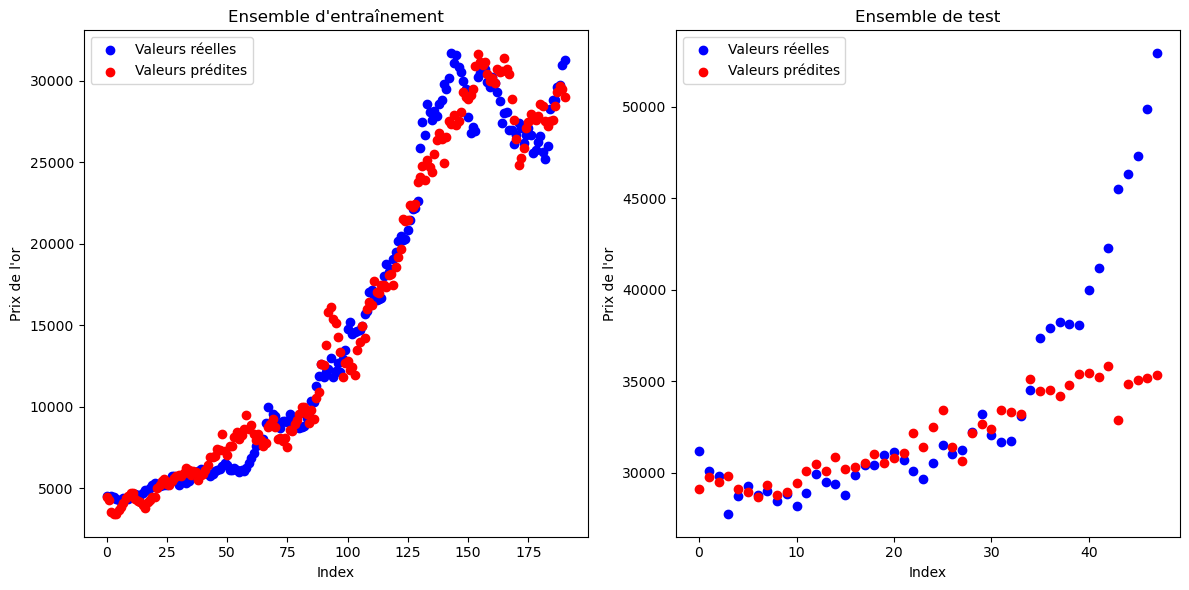

In [88]:
# regularisation RIDGE
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import time  # Pour mesurer le temps d'entraînement
import matplotlib.pyplot as plt  # Pour la visualisation

# Préparer les données
X = data[["Crude_Oil", "Interest_Rate", "USD_INR", "Sensex", "CPI", "USD_Index"]].values
y = data["Gold_Price"].values

# Ajouter une colonne de biais (pour l'interception)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Diviser les données en ensembles d'entraînement et de test
n_train = int(0.8 * len(X))  # 80% pour l'entraînement
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Définir le paramètre de régularisation (lambda)
lambd = 100  # Ajustez selon les besoins

# Fonction pour mesurer le temps d'entraînement
def calculer_coefficients_ridge(X_train, y_train, lambd):
    start_time = time.time()  # Début du chronométrage
    I = np.eye(X_train.shape[1])  # Matrice identité
    I[0, 0] = 0  # Pas de régularisation pour le biais
    coefficients = np.linalg.inv(X_train.T @ X_train + lambd * I) @ X_train.T @ y_train
    end_time = time.time()  # Fin du chronométrage
    training_time = end_time - start_time
    return coefficients, training_time

# Calculer les coefficients et le temps d'entraînement
coefficients, training_time = calculer_coefficients_ridge(X_train, y_train, lambd)

# Prédictions
y_train_pred = X_train @ coefficients
y_test_pred = X_test @ coefficients

# Calculer le MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

# Calculer le R^2
def r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r2_train = r2(y_train, y_train_pred)
r2_test = r2(y_test, y_test_pred)


#Sauvegarde des resultats :
complexity = len(coefficients)
results.append({
            'Modèle': "Ridge",
            'MSE': mse_test,
            'Précision (R²)': r2_test,
            'Temps d\'entraînement (s)': training_time,
            'Complexité (paramètres)': complexity
        })

# Afficher les résultats
print(f"Temps d'entraînement : {training_time:.4f} secondes")
print(f"MSE sur les données d'entraînement : {mse_train}")
print(f"R^2 sur les données d'entraînement : {r2_train}")
print(f"MSE sur les données de test : {mse_test}")
print(f"R^2 sur les données de test : {r2_test}")

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Données d'entraînement
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_train)), y_train, color='blue', label="Valeurs réelles")
plt.scatter(range(len(y_train)), y_train_pred, color='red', label="Valeurs prédites")
plt.title("Ensemble d'entraînement")
plt.xlabel("Index")
plt.ylabel("Prix de l'or")
plt.legend()

# Données de test
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label="Valeurs réelles")
plt.scatter(range(len(y_test)), y_test_pred, color='red', label="Valeurs prédites")
plt.title("Ensemble de test")
plt.xlabel("Index")
plt.ylabel("Prix de l'or")
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()


Temps d'entraînement : 2.0756 secondes
Erreur quadratique moyenne (MSE) : 0.25075698188147544
R2 : 0.7671489468041992


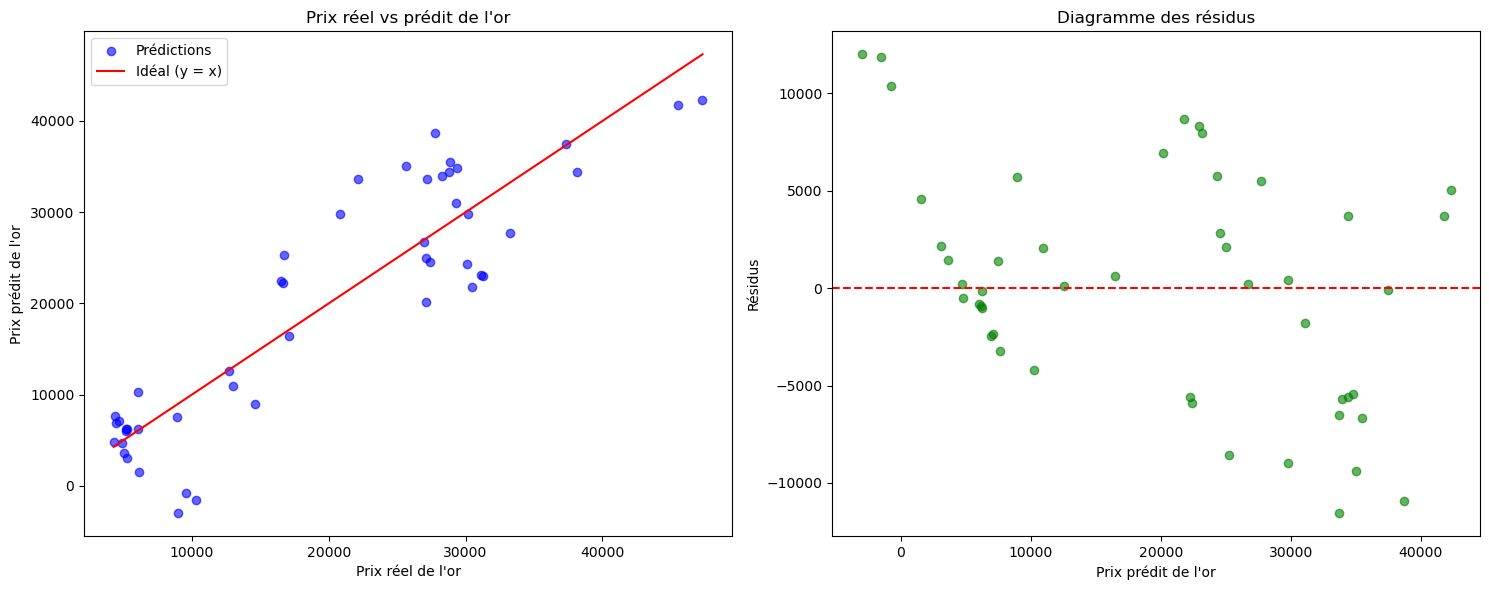

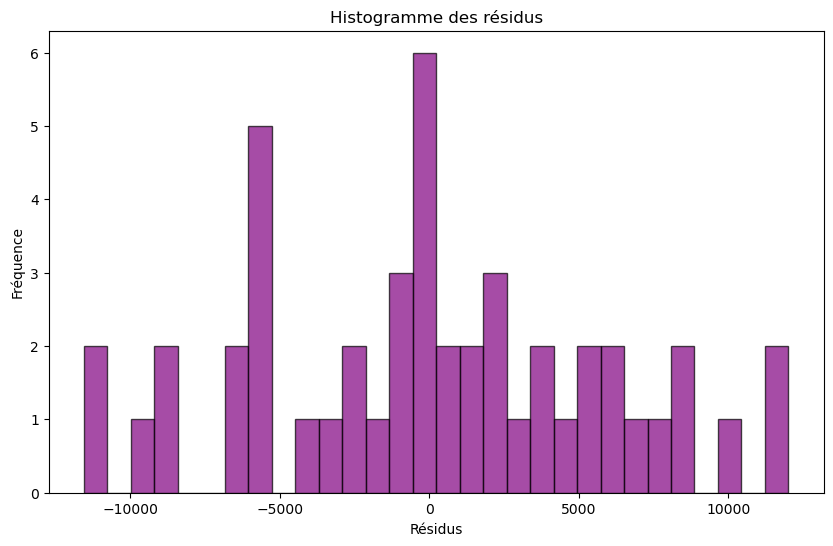

In [96]:
#SVM
#SVM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time  # Pour mesurer le temps d'entraînement

# Charger les données
donnees = pd.read_csv('GoldUP.csv')

# Prétraitement des données
# Supprimer la colonne "Date" et définir les caractéristiques et la cible
donnees = donnees.drop(columns=['Date'])
X = donnees.drop(columns=['Gold_Price']).values
y = donnees['Gold_Price'].values

# Normalisation des caractéristiques et de la cible
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_normalise = scaler_X.fit_transform(X)
y_normalise = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalise, y_normalise, test_size=0.2, random_state=42)

# Implémentation de l'algorithme SVM pour la régression
class SVR:
    def __init__(self, taux_apprentissage=0.001, param_lambda=0.01, nb_iterations=1000):
        self.taux_apprentissage = taux_apprentissage
        self.param_lambda = param_lambda
        self.nb_iterations = nb_iterations
        self.w = None
        self.b = None

    def ajuster(self, X, y):
        n_echantillons, n_caracteristiques = X.shape

        # Initialisation des poids et biais avec des petites valeurs aléatoires
        self.w = np.random.randn(n_caracteristiques) * 0.01
        self.b = 0

        # Descente de gradient pour la régression
        for _ in range(self.nb_iterations):
            for idx, x_i in enumerate(X):
                # Calcul de la prédiction
                prediction = np.dot(x_i, self.w) + self.b
                # Calcul de l'erreur
                erreur = y[idx] - prediction

                # Mise à jour des poids et biais
                self.w -= self.taux_apprentissage * (-2 * self.param_lambda * self.w + (-2 * erreur * x_i))
                self.b -= self.taux_apprentissage * (-2 * erreur)

    def predire(self, X):
        return np.dot(X, self.w) + self.b

# Mesurer le temps d'entraînement
start_time = time.time()

# Entraîner le modèle
svr = SVR(taux_apprentissage=0.001, param_lambda=0.01, nb_iterations=1000)
svr.ajuster(X_train, y_train)

# Calculer le temps d'entraînement
end_time = time.time()
training_time = end_time - start_time
print(f"Temps d'entraînement : {training_time:.4f} secondes")

# Faire des prédictions
predictions = svr.predire(X_test)

# Retour à l'échelle originale des prédictions
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Évaluer les performances
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"R2 : {r2}")

# Calcul de la complexité
n_train, d = X_train.shape  # Nombre d'échantillons et de caractéristiques dans l'ensemble d'entraînement
complexity = d + 1  # Poids + biais

#Sauvegarde des resultats :
results.append({
            'Modèle': "SVM",
            'MSE': mse,
            'Précision (R²)': r2,
            'Temps d\'entraînement (s)': training_time,
            'Complexité (paramètres)': complexity
        })


# Visualisation des résultats

# 1. Valeurs réelles vs prédites
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_original, predictions_original, color='blue', label='Prédictions', alpha=0.6)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Idéal (y = x)')  # Ligne idéale (y = x)
plt.xlabel('Prix réel de l\'or')
plt.ylabel('Prix prédit de l\'or')
plt.title('Prix réel vs prédit de l\'or')
plt.legend()

# 2. Diagramme des résidus
residus = y_test_original - predictions_original
plt.subplot(1, 2, 2)
plt.scatter(predictions_original, residus, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne horizontale à 0
plt.xlabel('Prix prédit de l\'or')
plt.ylabel('Résidus')
plt.title('Diagramme des résidus')
plt.tight_layout()
plt.show()

# 3. Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(residus, bins=30, edgecolor='black', color='purple', alpha=0.7)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Histogramme des résidus')
plt.show()


               Modèle           MSE  Précision (R²)  Temps d'entraînement (s)  \
0            Lineaire  8.688144e+06        0.926412                  0.000998   
1  Polynomiale deg=18  8.892398e+05        0.992468                  0.000000   
2               Lasso  3.746872e+08       -1.565985                  0.116682   
3               Ridge  2.419348e+07        0.371299                  0.000000   
4                 SVM  2.507570e-01        0.767149                  2.075581   

   Complexité (paramètres)  
0                        2  
1                       19  
2                        6  
3                        7  
4                        7  


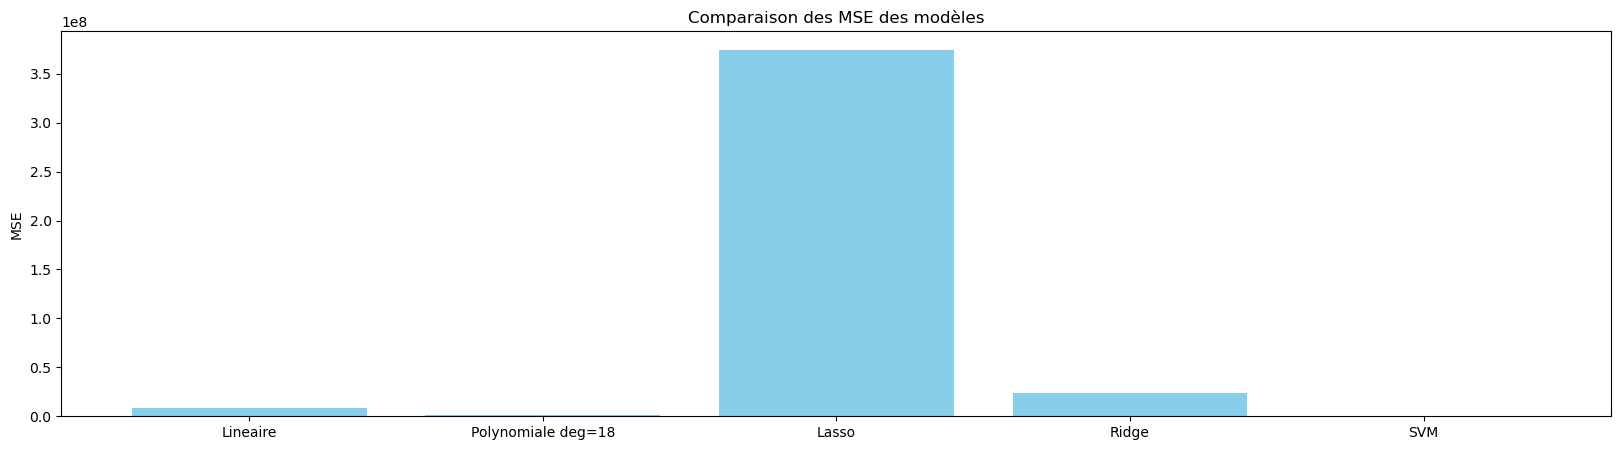

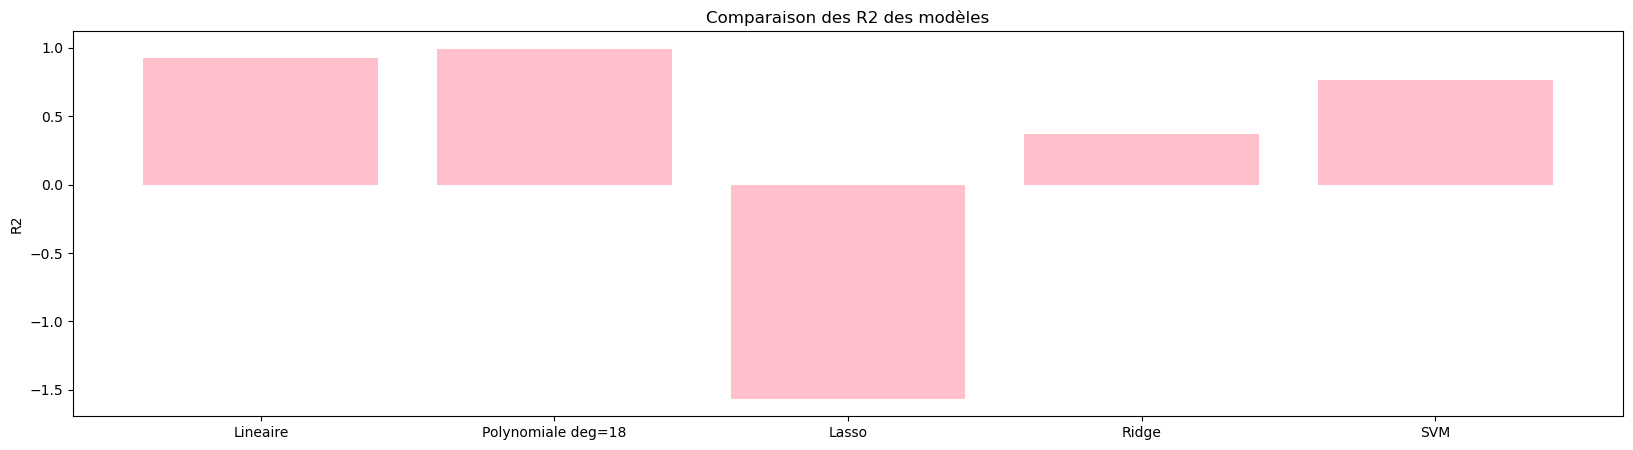

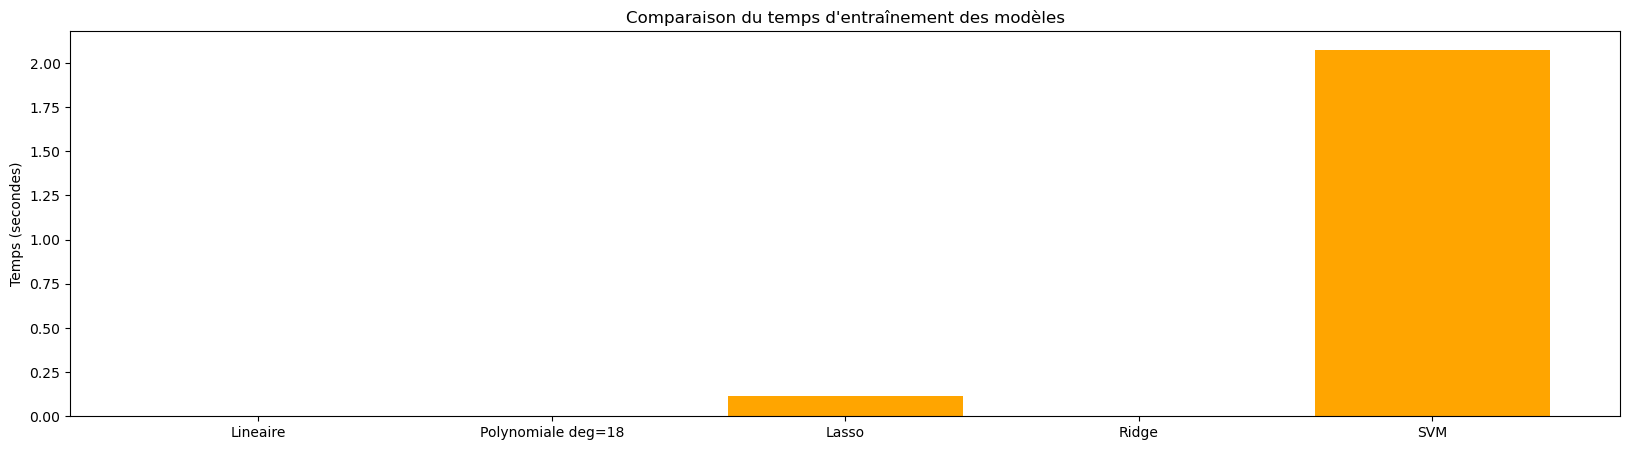

In [109]:
results = pd.DataFrame(results)
print(results)

# Graphique des MSE
plt.figure(figsize=(20, 5))
plt.bar(results['Modèle'], results['MSE'], color='skyblue')
plt.title('Comparaison des MSE des modèles')
plt.ylabel('MSE')
plt.show()

# Graphique des R2
plt.figure(figsize=(20, 5))
plt.bar(results['Modèle'], results['Précision (R²)'], color='pink')
plt.title('Comparaison des R2 des modèles')
plt.ylabel('R2')
plt.show()

# Graphique du temps d'entraînement
plt.figure(figsize=(20, 5))
plt.bar(results['Modèle'], results['Temps d\'entraînement (s)'], color='orange')
plt.title('Comparaison du temps d\'entraînement des modèles')
plt.ylabel('Temps (secondes)')
plt.show()

In [ ]:
# -------------- cross validation -----------------------
import numpy as np
from sklearn.linear_model import LinearRegression

def custom_cross_val_score(model, x, y, cv=5):
    """
    Implémente une validation croisée personnalisée.
    
    Args:
        model: Modèle de régression.
        x: Matrice des caractéristiques (features).
        y: Variable cible.
        cv: Nombre de plis pour la validation croisée.
        
    Returns:
        scores: Liste des scores R² pour chaque pli.
    """
    # Diviser les indices en `cv` groupes
    n_samples = x.shape[0]
    fold_size = n_samples // cv
    scores = []
    
    for i in range(cv):
        # Définir les indices pour le test et l'entraînement
        test_indices = range(i * fold_size, (i + 1) * fold_size)
        train_indices = list(set(range(n_samples)) - set(test_indices))
        
        # Diviser les données
        x_train, x_test = x[train_indices], x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        # Entraîner le modèle
        model.fit(x_train, y_train)
        
        # Prédire sur les données de test
        y_pred = model.predict(x_test)
        
        # Calculer le score R²
        ss_total = np.sum((y_test - np.mean(y_test))**2)
        ss_residual = np.sum((y_test - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total)
        
        scores.append(r2)
    
    return scores

# Exemple d'utilisation
model = LinearRegression()
x = np.random.rand(100, 1)  # Exemple de données
y = 3 * x.squeeze() + np.random.randn(100)  # Exemple de cible

scores = custom_cross_val_score(model, x, y, cv=5)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {np.mean(scores)}")